# Introduction

This challenge is the capstone project of the Summer Analytics, a primer course on Data Science, conducted by Consulting and Analytics Club of IIT Guwahati.

### Problem Statement:

You have been provided descriptions of products on Amazon and Flipkart, including details like product title, ratings, reviews, and actual prices. In this challenge, you will predict discounted prices of the listed products based on their ratings and actual prices.

### Data Description

title - Name of the product

Rating- average rating given to a product

maincateg - category that the product is listed under(men/women)

platform - platform on which it is sold on (Eg. Amazon, Flipkart)

price1 - Discounted Price of the listed product

actprice1 - Actual price of the listed product

Offer % - Discount percent

norating1 - number of ratings available for a particular product

noreviews1 - number of reviews available for a particular product

star_5f - number of five star ratings given to a particular product

star_4f - number of four star ratings given to a particular product

star_3f - number of three star ratings given to a particular product

star_2f - number of two star ratings given to a particular product

star_1f - number of one star ratings given to a particular product

fulfilled1- whether it is Amazon fulfilled or not

### Importing modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Reading and exploring Training Data

In [2]:
df=pd.read_csv("train.csv")
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [3]:
df.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [4]:
df.describe()

,id,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,15730.000000,15730.000000,15730.000000,15730.000000,15052.000000,15152.000000,15142.000000,15191.000000,15499.000000,15730.000000,15730.000000,15730.000000
mean,10479.541577,4.012873,688.070693,1369.286777,3057.660776,423.976307,1585.239466,655.923310,357.260662,155.085188,275.500572,0.601526
std,6080.166276,0.298440,649.409586,1240.900227,11846.965689,1768.230384,6177.476241,2855.735531,1402.246610,558.650254,958.589075,0.489600
min,3.000000,0.000000,69.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5212.000000,3.900000,349.000000,699.000000,63.000000,9.000000,30.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,10458.500000,4.000000,474.000000,999.000000,308.000000,44.000000,150.000000,60.000000,34.000000,17.000000,30.000000,1.000000
75%,15766.750000,4.200000,699.000000,1299.000000,1526.000000,215.000000,788.000000,300.000000,172.000000,77.000000,140.000000,1.000000
max,20973.000000,5.000000,5998.000000,13499.000000,289973.000000,45448.000000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000


## Visualization

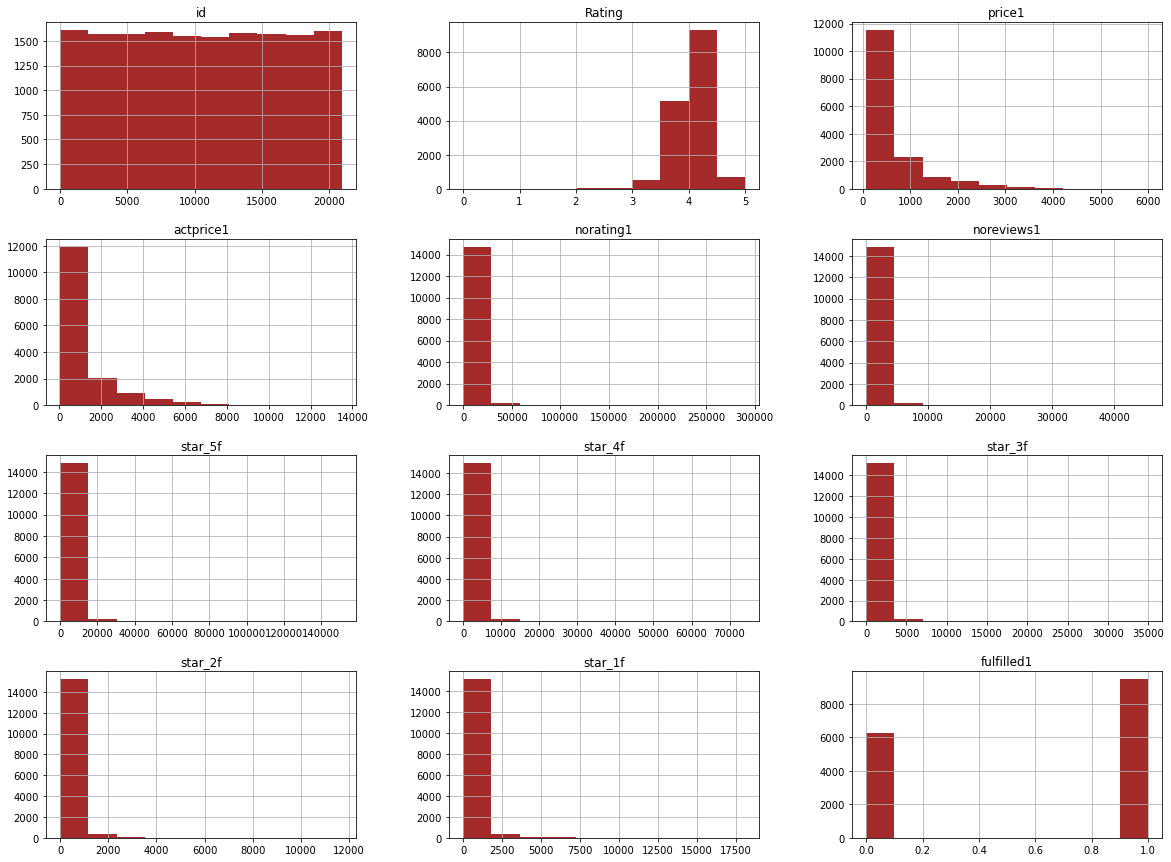

In [20]:
#representing features in histogam form:
df.hist(color='brown',figsize=(20,15))
plt.show()

### Feature Selection

<AxesSubplot:>

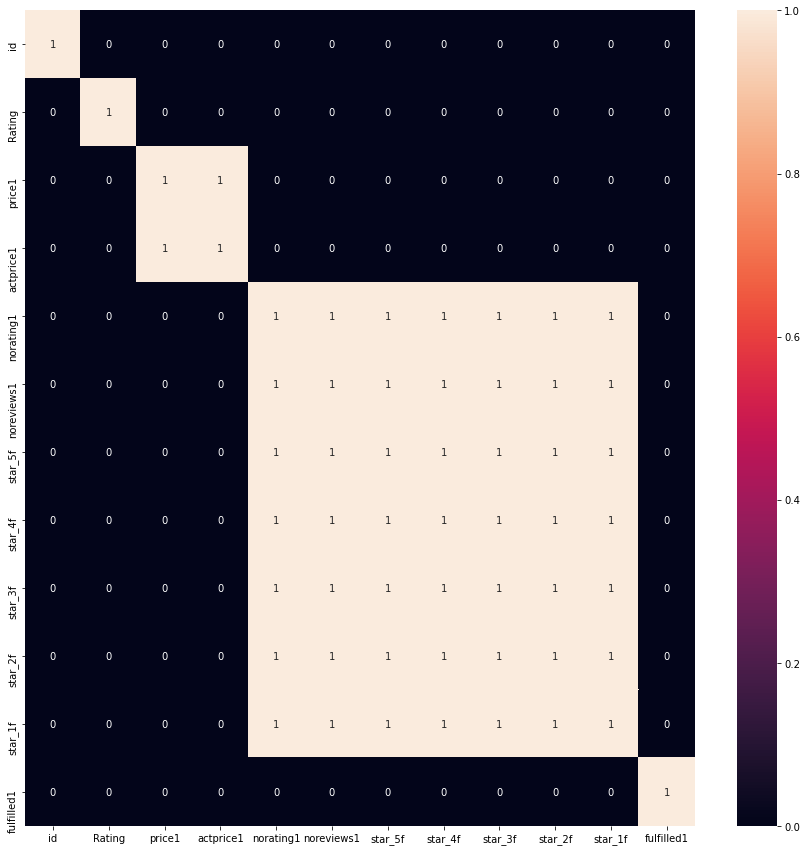

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap((df.corr()>0.85),annot=True)

In [6]:
df.nunique()

id            15730
title          4782
Rating           34
maincateg         2
platform          2
price1         1478
actprice1       885
Offer %        2530
norating1      2770
noreviews1     1122
star_5f        2196
star_4f        1448
star_3f        1107
star_2f         759
star_1f        1001
fulfilled1        2
dtype: int64

### One Hot Encoding

In [12]:
X=df.drop(columns=['id','title','price1','Offer %'])
X['maincateg'].fillna(X['maincateg'].mode()[0], inplace=True)
X['fulfilled1'].fillna(X['fulfilled1'].mode()[0], inplace=True)
X['norating1'] = X['norating1'].fillna(0)
X=X.drop(columns=['noreviews1','star_5f','star_4f','star_3f','star_2f','star_1f'])
X=pd.get_dummies(X, columns = ['maincateg','platform'])
X.head(10)

,Rating,actprice1,norating1,fulfilled1,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.9,999,38.0,0,0,1,0,1
1,3.8,1999,531.0,1,1,0,0,1
2,4.4,4999,17.0,1,0,1,0,1
3,4.2,724,46413.0,1,1,0,0,1
4,3.9,2299,77.0,1,1,0,0,1
5,4.1,499,274.0,0,0,1,0,1
6,4.0,999,249.0,1,0,1,0,1
7,3.9,1299,121.0,0,0,1,0,1
8,4.2,999,191.0,1,0,1,0,1
9,4.1,899,36126.0,0,1,0,0,1


In [13]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [14]:
X.shape

(15730, 8)

In [15]:
y=df['price1']

### 1]RandomForestRegressor

#### HyperParameterTuning:

In [16]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

## Importing Random Forest Classifier from the sklearn.ensemble
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

Finding best parameters that suits our model:

In [20]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True}  



In [21]:
randmf = RandomForestRegressor(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 120, bootstrap= True) 
randmf.fit( X, y) 

RandomForestRegressor(max_depth=120, max_features='sqrt')

### 2] XGBoostRegressor

#### HyperParameterTuning:

In [22]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
model_XGB = XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1,
             monotone_constraints='()', n_estimators=900, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None).fit(X, y)
r_sq_XGB = model_XGB.score(X, y)
print(f"coefficient of determination: {r_sq_XGB}")
print(mean_squared_error(y, model_XGB.predict(X), squared=False))

coefficient of determination: 0.9964902539224962
38.47182057468896


### Reading and Exploring Test Data

In [23]:
df_test=pd.read_csv('test.csv')
df_test.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [24]:
df_test.isnull().sum()

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [25]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [26]:
X1=df_test.drop(columns=['id','title'])
X1.Rating.fillna(df.Rating.mean(),inplace=True)
X1['maincateg'].fillna(X1['maincateg'].mode()[0], inplace=True)
X1['fulfilled1'].fillna(X1['fulfilled1'].mode()[0], inplace=True)
X1['norating1'] = X1['norating1'].fillna(0)
X1=X1.drop(columns=['noreviews1','star_5f','star_4f','star_3f','star_2f','star_1f'])
X1=pd.get_dummies(X1, columns = ['maincateg','platform'])
X1 = scaler.transform(X1)

### Taking average of XGBoost & Randomforest Regressor:

In [27]:
ans1=randmf.predict(X1)
print(ans1.shape)
ans2=model_XGB.predict(X1)
print(ans2.shape)
ans=(0.37*ans1+0.63*ans2)/2

(5244,)
(5244,)


In [28]:
id=df_test.id.to_numpy()
id.shape

(5244,)

In [34]:
submission_2=pd.DataFrame({'id':id,'price1':ans},columns=['id','price1'])
submission_2.head(15)

,id,price1
0,2242,214.139017
1,20532,156.947844
2,10648,238.312810
3,20677,380.368106
4,12593,201.080138
5,11159,226.525914
6,10680,204.399164
7,6433,1301.339651
8,2794,128.995741
9,11579,363.786082


In [35]:
submission_2.to_csv('submission.csv',index=False)